In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from pandas.plotting import autocorrelation_plot
from pmdarima import auto_arima

In [2]:
df = pd.read_csv(r"D:\EOY Datasets\Full Datasets\Everything_cleaned.csv",index_col=0)

C:\Users\ellio\anaconda3\lib\site-packages\numpy\lib\arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [3]:
#df = df.reset_index(drop=True)

In [4]:
df.head()

,Crime_ID,Month,Reported_by,Crime_type,Outcome_type,Year,Level_of_Lockdown,Region
0,e9a50727f2189e0c50f704e3661bc1a8ae3a39aece4866...,2019-01,Avon and Somerset,Violence and sexual offences,No suspect identified,2019,No Lockdown,South West
1,fb06f54e9d633a961109ef74171e4beb40b2fe44e57a10...,2019-01,Avon and Somerset,Violence and sexual offences,Unable to prosecute suspect,2019,No Lockdown,South West
2,4655ba031d5c8d00b247577a22472fbb8f9130d98b7d95...,2019-01,Avon and Somerset,Violence and sexual offences,No suspect identified,2019,No Lockdown,South West
3,2830f28a4a93138717182d1cc51b6d77cfaf3c27398934...,2019-01,Avon and Somerset,Theft offences,No suspect identified,2019,No Lockdown,South West
4,ca01d599d45f6e1d1bc5b05ddc6a1b559870fc831baa8e...,2019-01,Avon and Somerset,Theft offences,No suspect identified,2019,No Lockdown,South West


In [7]:
df['Crime_type'].value_counts()

Violence and sexual offences    4587794
Theft offences                  2878577
Criminal damage and arson       1258377
Public order offences           1127542
Drug offences                    445273
Name: Crime_type, dtype: int64

In [8]:
df.Month = pd.to_datetime(df['Month'], format='%Y-%m')

In [9]:
grouped = df.groupby(['Month','Crime_type'])['Crime_ID'].count()
grouped = grouped.reset_index().rename(columns={'Crime_ID':'Count'})

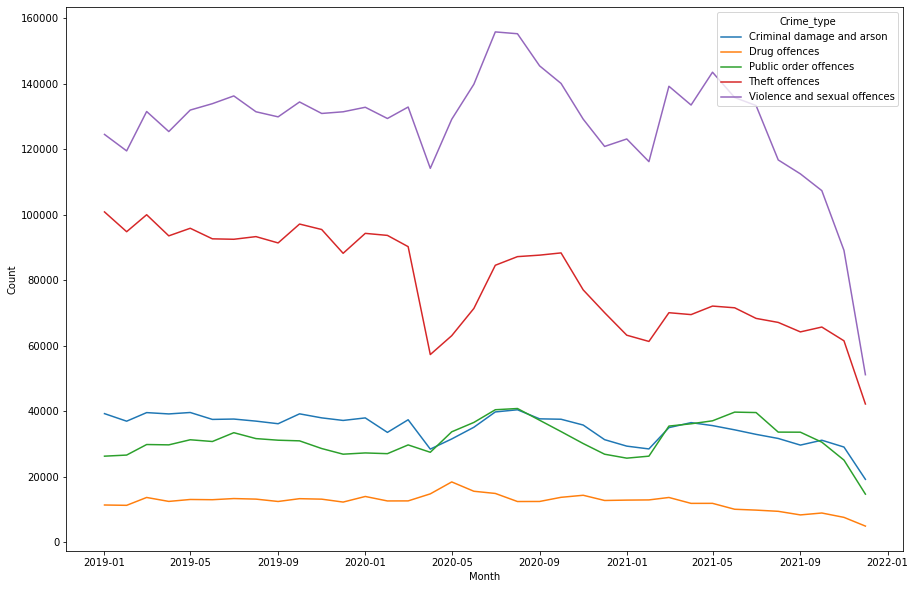

In [10]:
plt.figure(figsize=(15,10))
sns.lineplot(data=grouped,x='Month',y='Count', hue='Crime_type')
plt.show()

In [11]:
grouped

,Month,Crime_type,Count
0,2019-01-01,Criminal damage and arson,39310
1,2019-01-01,Drug offences,11424
2,2019-01-01,Public order offences,26327
3,2019-01-01,Theft offences,100874
4,2019-01-01,Violence and sexual offences,124529
...,...,...,...
175,2021-12-01,Criminal damage and arson,19252
176,2021-12-01,Drug offences,4987
177,2021-12-01,Public order offences,14742
178,2021-12-01,Theft offences,42251


<AxesSubplot:ylabel='Frequency'>

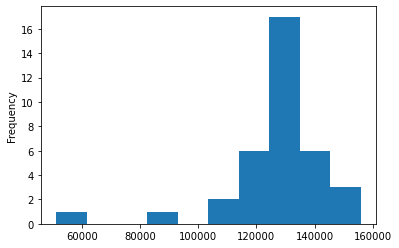

In [12]:
vio = grouped[grouped['Crime_type']=='Violence and sexual offences']
vio = vio.set_index('Month')
vio = vio['Count']
vio_cut = vio[0:14]
vio.plot.hist()

In [13]:
from statsmodels.tsa.stattools import adfuller
adfuller(vio)[1]

0.9940593894569902

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

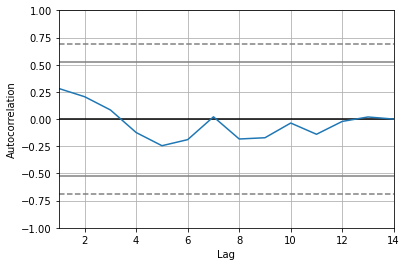

In [14]:
autocorrelation_plot(vio_cut)

In [15]:
train = vio_cut
train

Month
2019-01-01    124529
2019-02-01    119497
2019-03-01    131521
2019-04-01    125402
2019-05-01    131961
2019-06-01    133913
2019-07-01    136278
2019-08-01    131443
2019-09-01    129890
2019-10-01    134433
2019-11-01    130926
2019-12-01    131435
2020-01-01    132816
2020-02-01    129386
Name: Count, dtype: int64

In [16]:
stepwise_fit = auto_arima(train,trace=True,suppress_warnings=True,d=1)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=271.144, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=262.562, Time=0.00 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=263.356, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=262.718, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=260.633, Time=0.00 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=256.694, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=253.949, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=255.891, Time=0.01 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=255.914, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=254.693, Time=0.08 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=255.044, Time=0.02 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=262.850, Time=0.10 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=251.960, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=255.202, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=253.5

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   14
Model:               SARIMAX(1, 1, 2)   Log Likelihood                -121.865
Date:                Tue, 21 Jun 2022   AIC                            251.731
Time:                        13:08:05   BIC                            253.990
Sample:                             0   HQIC                           251.266
                                 - 14                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5629      0.197     -2.860      0.004      -0.949      -0.177
ma.L1          0.5276      0.341      1.546      0.122      -0.141       1.197
ma.L2          0.0800      0.163      0.489      0.625      -0.240       0.400
sigma2      8.193e+06    6.8e-09    1.2e+15      0.000    8.19e+06    8.19e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.31   Jarque-Bera (JB):                 0.48
Prob(Q):                              0.58   Prob(JB):                         0.79
Heteroskedasticity (H):               3.49   Skew:                            -0.03
Prob(H) (two-sided):                  0.25   Kurtosis:                         2.06
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.88e+31. Standard errors may be unstable.
"""

In [67]:
from statsmodels.tsa.arima.model import ARIMA
train.index = pd.DatetimeIndex(train.index.values,
                               freq=train.index.inferred_freq)
model = ARIMA(train, order=(1,1,2),seasonal_order=(1,1,1,13))
model_fit = model.fit()
yhat = model_fit.predict(len(train), len(train)+4) 
print(yhat)


2020-03-01    124354.0
2020-04-01    136378.0
2020-05-01    130259.0
2020-06-01    136818.0
2020-07-01    138770.0
Freq: MS, Name: predicted_mean, dtype: float64


C:\Users\ellio\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\ellio\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\ellio\anaconda3\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:1220: RuntimeWarning: invalid value encountered in true_divide
  np.inner(score_obs, score_obs) /


(array([17897., 18017., 18140., 18262., 18383., 18506., 18628., 18748.,
        18871., 18993.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

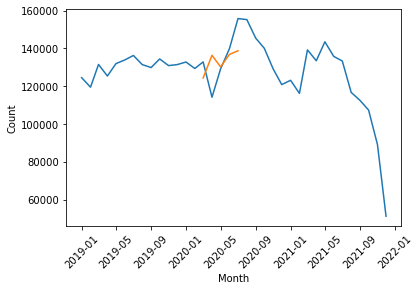

In [66]:
sns.lineplot(data=vio)
sns.lineplot(data=yhat)
plt.xticks(rotation = 45)

In [69]:
vio_normed = vio/67220000*10000
yhat_normed = yhat/67220000*10000

(array([18322., 18336., 18353., 18367., 18383., 18397., 18414., 18428.,
        18444.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

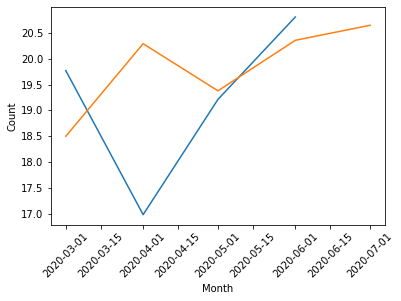

In [70]:
sns.lineplot(data=vio_normed[14:18])
sns.lineplot(data=yhat_normed)
plt.xticks(rotation = 45)

In [21]:
model = ARIMA(rolling_mean, order=(0,1,0))
model_fit = model.fit()
yhat2 = model_fit.predict(len(rolling_mean), len(rolling_mean)+4) 

NameError: name 'rolling_mean' is not defined